# 18BCE101

## DM prac 6

__AIM:__
    
Implement K-Means Algorithm cluster the following eight points (with (x; y) representing location) into three clusters.

A1(2; 10);A2(2; 5);A3(8; 4);B1(5; 8);B2(7; 5);B3(6; 4);C1(1; 2);C2(4; 9):

The distance function is Euclidean distance. Suppose initially we assign A1, B1, and C1 as the center of each cluster, respectively. Use the k-means algorithm to show the three cluster centers and the all the points of clusters after the 2nd round of execution.


In [1]:
#importing necessary libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

## Given data

In [2]:
data = pd.read_csv('givendata.csv')
data.head()

,X,Y
0,2,10
1,2,5
2,8,4
3,5,8
4,7,5


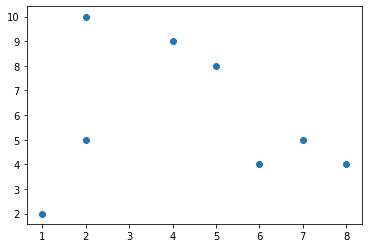

In [3]:
plt.scatter(data.X, data.Y)

In [4]:
#innitial centers - 

a = [2,10]
b = [5,8]
c = [1,2]

In [5]:
#finding euclidean distance between each to find new cluster centers for the first iteration

def kmean_calculation(data,a,b,c):
    c1 = []
    c2 = []
    c3 = []

    for i in range(8):
        dist1 = np.sqrt((a[0] - data.X[i])**2 + (a[1] - data.Y[i])**2)
        dist2 = np.sqrt((b[0] - data.X[i])**2 + (b[1] - data.Y[i])**2)
        dist3 = np.sqrt((c[0] - data.X[i])**2 + (c[1] - data.Y[i])**2)
        minDist = min(dist1, min(dist2,dist3))
        l = []
        if minDist == dist1:
            l.append(data.X[i])
            l.append(data.Y[i])
            c1.append(l)
        elif minDist == dist2:
            l.append(data.X[i])
            l.append(data.Y[i])
            c2.append(l)
        else:
            l.append(data.X[i])
            l.append(data.Y[i])
            c3.append(l)
            
    return c1,c2,c3

In [6]:
#finding new cluster centers -

def new_centers(c1,c2,c3):
    x_val = []
    y_val = []
    a = []
    for i in c1:
        x_val.append(i[0])
        y_val.append(i[1])
    a.append(np.mean(x_val))
    a.append(np.mean(y_val))

    print("New center 1",a)

    x_val = []
    y_val = []
    b = []
    for i in c2:
        x_val.append(i[0])
        y_val.append(i[1])
    b.append(np.mean(x_val))
    b.append(np.mean(y_val))

    print("New center 2",b)

    x_val = []
    y_val = []
    c = []
    for i in c3:
        x_val.append(i[0])
        y_val.append(i[1])
    c.append(np.mean(x_val))
    c.append(np.mean(y_val))

    print("New center 3",c)
    
    return a,b,c

In [7]:
#first iteration

c1,c2,c3 = kmean_calculation(data,a,b,c)
print("After first iteration the clusters are as follows:\n")
print("Cluster 1:",c1)
print("Cluster 2:",c2)
print("Clsuter 3:",c3)

After first iteration the clusters are as follows:

Cluster 1: [[2, 10]]
Cluster 2: [[8, 4], [5, 8], [7, 5], [6, 4], [4, 9]]
Clsuter 3: [[2, 5], [1, 2]]


In [30]:
#next iterations

prevc1 = c1
prevc2 = c2
prevc3 = c3

for i in range(4):
    print("\n---------------------------------------------------------\n")
    print("\nAfter",i+2," iteration the clusters are as follows:\n")
    a,b,c = new_centers(c1,c2,c3)

    c1,c2,c3 = kmean_calculation(data,a,b,c)
    
    print("\nCluster 1:",c1)
    print("Cluster 2:",c2)
    print("Clsuter 3:",c3)
    
    if c1 == prevc1 and prevc2 == c2 and prevc3 == c3:
        break
    prevc1 = c1
    prevc2 = c2
    prevc3 = c3


---------------------------------------------------------


After 2  iteration the clusters are as follows:

New center 1 [3.6666666666666665, 9.0]
New center 2 [7.0, 4.333333333333333]
New center 3 [1.5, 3.5]

Cluster 1: [[2, 10], [5, 8], [4, 9]]
Cluster 2: [[8, 4], [7, 5], [6, 4]]
Clsuter 3: [[2, 5], [1, 2]]


Thus as we see that the clusters remain same after third iteration we dont go forward with anymore iterations

In [10]:
xdata = data.iloc[:, :].values
print(type(xdata))

kmeans = KMeans(n_clusters= 3)

#predict the labels of clusters.
label = kmeans.fit_predict(xdata)
 
print(label)

<class 'numpy.ndarray'>
[0 2 1 0 1 1 2 0]


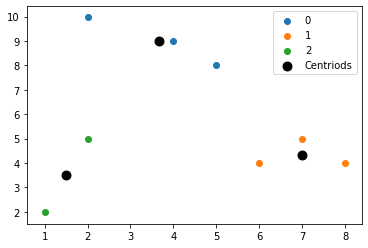

In [11]:
#Getting the Centroids
#getting uniquie labels

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(xdata[label == i , 0] , xdata[label == i , 1] , label = i)
    
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k', label = 'Centriods')
plt.legend()
plt.show()

## Real world example

In [12]:
datadf = pd.read_csv('Mall_Customers.csv')
datadf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
datadf.shape

(200, 5)

In [14]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= datadf.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [16]:
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X)
 
print(label)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 3 4 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 0 2 3 2 0 2 0 2 3 2 0 2 0 2 0 2 0 2 3 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


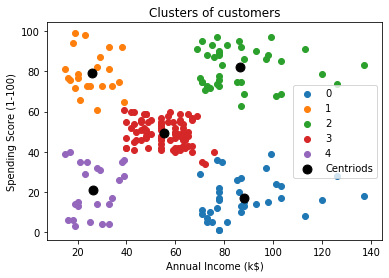

In [18]:
#Getting the Centroids
#getting uniquie labels

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
    
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k', label = 'Centriods')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Conclusion

Real world example Interpretation 

Cluster 1 (Green Color) -> earning high but spending less

Cluster 2 (Blue Color) -> average in terms of earning and spending 

Cluster 3 (orange Color) -> earning high and also spending high

Cluster 4 (purple Color) -> earning less but spending more

Cluster 5 (red Color) -> Earning less , spending less

K-Means clustering is an unsupervised learning algorithm. There is no labeled data for this clustering, unlike in supervised learning. K-Means performs division of objects into clusters that share similarities and are dissimilar to the objects belonging to another cluster.

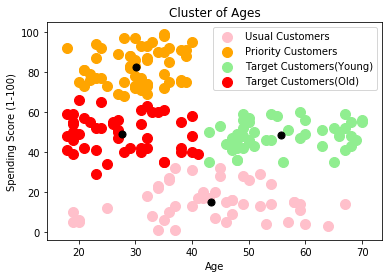

In [19]:
x = datadf.iloc[:, [2, 4]].values
kmeans = KMeans(n_clusters = 4, max_iter = 300)
labels = kmeans.fit_predict(x)
centroids = kmeans.cluster_centers_

plt.title('Cluster of Ages')

plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[labels == 3, 0], x[labels == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Conclusion

By the above clustering plot between the age of the customers and their corresponding spending scores

We can aggregate them into 4 different categories namely

1. Usual Customers

2. Priority Customers

3. Senior Citizen Target Customers

4. Young Target Customers

Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.